# Unidad 2: Fundamentos algoritmicos

Versión 2020. La versión 2021 saldrá conforme vayamos avanzando.

# Algoritmos

De manera intuitiva, un algoritmo es una serie de pasos que lleva toma una entrada y da una salida. Nosotros pensaremos en algoritmos que nos ayudan a resolver problemas generales, no sólo casos particulares.

**Ejemplo.** El siguiente no es un problema general:

"Ordena los números  $5,7,3,10,12,1$".

**Definición.** Un **problema algorítmico** consiste de:
- Una **entrada** y qué caracteristicas tiene.
- Una **salida** y qué características tiene.
- Un **problema** que hay que resolver.

*Ejemplo.*
- Problema. Ordenar una lista finita de números enteros
- Entrada. Una lista finita de números enteros: $a_1,a_2,\ldots,a_n$
- Salida. Una lista con esos mismos números, pero ordenada, es decir, una lista $b_1,b_2,\ldots,b_n$ tal que $b_i\leq b_j$ si $i\leq j$ y tal que ambas listas tengan los mismos elementos.

Un **algoritmo** es una serie de pasos que resuelve uno de estos problemas. Es decir, mediante un cierto proceso debemos tomar la entrada, cumplir el objetivo y dar una salida como se indica.

Un algoritmo puede ser descrito de varias formas:

- Con palabras
- Con pseudocódigo
- Con código de algún lenguaje de programación (Python, C++, PERL, PHP, Javascript, etc)

Hacia arriba es más entendible para humanos y más flexible, pero más difícil de que lo ejecute una computadora. Hacia abajo es menos entendible y requiere más formalidad. Hacia abajo tiene la ventaja de que una computadora lo puede ejecutar.

Decimos que hacia arriba la descripción de "nivel más alto" y hacia abajo es una descripción de "nivel más bajo".

Un caso particular de un algoritmo le llamamos **instancia**.

Lo que más nos interesa de los algoritmos son las siguientes tres cosas:

- Que sean **correctos**, es decir, que resuelvan *todas* las instancias del problema correctamente.
- Que sean **eficientes**, es decir, que no tomen ni mucho tiempo ni mucho espacio para ser ejecutados en términos del tamaño de la entrada.
- Que sean **fáciles de implementar**, decir, que se puedan escribir en código de manera sencilla.

# Correctitud de algoritmos

Es muy importante que los algoritmos que desarrollemos en verdad resuelvan el problema que estamos planteando. Esto es parecido a cuando en argumentos matemáticos queremos demostraciones que verdaderamente y de manera formal demuestren lo que se pide demostrar.

No es suficiente simplemente dar una idea general que parezca que resuelve el problema.

Una vez que tenemos una propuesta de algoritmo para un problema, hay dos posibilidades, que sea correcta o que no.
- Para verificar que es correcta, se debe dar una demostración de que el algoritmo resuelve correctamente *todas* las instancias.
- Para verificar que la propuesta es incorrecta, basta con ver que hay *una* instancia que resuelve mal.

# Cuando los algoritmos fallan

**Ojo.** Un algoritmo podría resolver correctamente muchisísimas de las instancias de un problema, y sin embargo ser un algoritmo incorrecto.

**Ejemplo**. Consideremos el siguiente problema:

- Problema. Decidir si cierta expresión siempre genera números primos.
- Entrada. Un número $n$ entero positivo.
- Salida. Decidir si la expresión $n^2-n+41$ es primo. Si sí es, responder "sí". Si no es, responder "no".

Propuesta de algoritmo: Responder siempre "sí".

Observemos que este algoritmo es correcto para las instancias $n=1,2,3,\ldots,10$ (ver código en la celda inferior). Pero esto no es suficiente. La instancia $n=41$ falla, pues $n^2-n+41=41^2-41+41=41^2$ que no es primo.

$\square$

In [46]:
nums=[]
for j in range(1,10):
    nums.append(j**2-j+41)
print(nums)
print("Todos estos de arriba son números primos.")

# Propuesta 1 de algoritmo
def expresion(n):
    print("{} es primo".format(n**2-n+41))
    
expresion(41)
print("Esto es un error.")

[41, 43, 47, 53, 61, 71, 83, 97, 113]
Todos estos de arriba son números primos.
1681 es primo
Esto es un error.


Veamos otro ejemplo que falla. El siguiente problema está motivado por la construcción de circuitos eléctricos de manera eficiente.

**Ejemplo.**
- Problema: Construir circuitos eléctricos.
- Entrada: Algunos puntos en el plano.
- Salida: Un camino que recorra a todos los puntos y que en total tome la menor distancia posible.

Propuesta 1 de algoritmo:

Algo que podría ser más o menos sensato es seguir una heurística de comenzar en un punto y después ir al más cercano de entre los que no sea han recorrido todavía. Aunque parece una buena elección, esta heurística de "punto más cercano" puede crear problemas que nos den un camino demasiado largo. Para ver que el algoritmo falla, basta con encontrar una instancia en la que falla.

En la parte inferior derecha de la figura, el camino de arriba sería el que el algoritmo propone, pero el de abajo es el óptimo. El algoritmo no resuelve el problema en esta instancia y por lo tanto no es correcto.

$\square$

# El problema de las películas

- Problema. Elegir máximo número de películas para ver.
- Entrada. Una lista de películas que empiezan y terminan a cierta hora.
- Salida. La mayor cantidad de películas que podemos ver completas sin que se traslapen.

Una posible estrategia puede ser escoger la primera que podamos ver, y luego la siguiente, y luego la siguiente y así sucesivamente. Sin embargo, esto puede causar que veamos una película demasiado larga, y que ya no podamos ver nada más, o que perdamos muchas películas intermedias. Un contraejemplo sería una película muy larga, con películas más pequeñas intermedias.

El párrafo anterior sugiere que a lo mejor es una buena idea escoger la película de menor duración, y luego la siguiente y luego la siguiente, etc. Esto hace que pase mucho tiempo y que no películas cuando la de menor duración va hasta el final.

¿Qué tal elegir la de menor duración, de ahí la siguiente que no se empalme, y así sucesivamente, pero ya que las elegimos, verlas en el orden que debe ser? Esta tampoco funciona pues una de duración corta puede "anular" dos de duración más larga.

Veamos un ejemplo de un algoritmo que sí funciona.

Tomemos la película que termine primero. Y luego, de las que queden, la primera que termine. Y luego de las que quedan, la primera que termine y así sucesivamente.

Este algoritmo es bueno pues en cada momento, si $P$ es la película que termina primero, entonces es la mejor que podemos ver. Esto se debe a que cualquier otra película:

- O bien comienza antes de que termine $P$, pero nos deja con menos tiempo para ver otras películas.
- O bien comienza después de que termine $P$ y todavía podríamos considerar verla.

Si quisiéramos dar una demostración todavía más formal, podríamos plantear el problema así:

- Problema. Máximo conjunto independiente de intervalos.
- Entrada. Intervalos $[a_1,b_1],\ldots,[a_n,b_n]$ de $\mathbb{R}$
- Salida. La mayor cantidad de intervalos ajenos.



# ¿Cómo ver que los algoritmos sí funcionan?


Tenemos dos herramientas básicas para mostrar que los algoritmos sí funcionan: inducción/recursión y estructuras matemáticas recursivas.

## Demostraciones por inducción

Lo que nos permite inducción y recursión es poner un problema o una demostración en términos de instancias más pequeñas. Si a partir de suponer que estas instancias se pueden resolver (o son correctas), logramos mostrar un nuevo caso, entonces podemos cubrir todos los casos.

Consideremos el siguiente problema:

- Problema: Aumentar en 1.
- Entrada: Un entero no negativo $n$
- Salida: El entero n+1.

Propuesta de algoritmo:

`Incrementar(y):
    si y=0, respondemos 1, si no:
        si y es impar, entonces
            respondemos 2*Incrementar(Parte-entera(y/2))
        si y es par, respondemos(y+1)
`

Vamos a probar de manera inductiva que este algoritmo es correcto, es decir, que para cualquier instancia da la respuesta correcta.

*Demostración.*  Hagamos inducción fuerte en $y$. Si $y=0$, el algoritmo tiene un caso específico para esto, que es responder $1$, lo cual es correcto. Esto prueba el caso base.

Supongamos que el algoritmo funciona para cualquier entero hasta $y$, y veamos qué sucede con $y+1$. Esto nos lleva a dos casos.

Caso 1 ($y+1$ es impar). En este caso, tenemos que $y+1$ es impar, digamos que $y+1=2k+1$. Cuando hacemos esto, el algoritmo cae en el caso de entrada impar, de modo que responde $$2\text{Incrementar}(\lfloor (y+1)/2\rfloor) = 2\text{Incrementar}(\lfloor(2k+1)/2\rfloor) = 2\text{Incrementar}(k)=2(k+1)=2k+2=y+2.$$

Caso 2 ($y+1$ es par). En este caso, el algoritmo cae en el caso de que su entrada es par, y respondería $(y+1)+1=y+2$, que es correcto.

$\square$

# Estructuras matemáticas recursivas

Cuando tenemos un problema "de la vida real", usualmente no está planteado en términos de objetos matemáticos. Lo que necesitamos hacer es un "modelo" utilizando objetos matemáticos que reflejen propiedades importantes de lo que queremos.

En muchas ocasiones, los problemas que estamos estudiando se pueden plantear en términos de estructuras matemáticas discretas y recursivas. Con lo de "recursivas" nos referimos a que si tenemos un cierto objeto, todos o algunos de sus "subobjetos" son del mismo tipo.

Algunos ejemplos de estas estructuras son:

- Conjuntos: Se refiere a colecciones de objetos en donde no nos importa el orden, por ejemplo $\{4,1,3^2, 8, 10\}$
- Permutaciones: Se refieren a las formas de ordenar $n$ objetos, digamos, $\{1,2,3,\ldots, n\}$. Una forma de pensarlo es escribir los números en el orden que la permutación dice, por ejemplo, $15423$ es una permutación de $\{1,2,3,4,5\}$. Otras permutaciones son $41253$, $13425$.
- Listas de objetos en donde importa su posición: Son colecciones donde se pueden repetir objetos y nos importa su posición, como $1,5,6,4,3,3,1$
- Conjuntos de puntos en un espacio geométrico: Por ejemplo, en el plano o en el espacio.
- Cadenas de letras: Parecido a listas. Se usan para representar lenguaje hablado. En la computadora usualmente son otro tipo de estructuras.
- Gráficas: Reflejan relaciones de parejas entre objetos.
- Árboles: Reflejan posiciones que se conectan, pero también relaciones de jerarquía.
- Gráficas planas: Reflajan redes o mapas.
- Etc.




# Análisis de algoritmos

El análisis de algoritmos consiste en decir, de manera teórica, cuánto tiempo se tardará un algoritmo en ejecutarse para resolver un problema. Cuando decimos que es un estudio teórico, lo que nos gustaría es que no dependa de la computadora que usemos, ni del lenguaje de programación en cual está escrito el algortimo. A grandes rasgos, sólo nos interesa "cuánto tiempo tardará cuando la entrada se hace grande".

## El modelo RAM

El modelo con el cual trabajaremos es una computadora "teórica" para la cual se cumple lo siguiente:

- Cada operación simple (por ejemplo, $+,-,\cdot, =,$ etc) toma exctamente una unidad de tiempo.
- Los bucles *no* son operaciones simples. El tiempo que toman depende de cuántas veces hacen operaciones simples.
- Cada acceso a la memoria (ya sea cache o disco duro duro) toma una unidad de tiempo también.

Este modelo no es ultra realista pues las computadoras se comportan un poquito diferente, pero sí es muy bueno para estimar qué tan buenos son los algoritmos cuando las instancias comienzan a volverse grandes.

## Distintos tipos de complejidades

Recordemos que si tenemos un problema algoritmico, un algoritmo es un procedimiento que resuelve *todas* las instancias del problemas determinadas por la entrada del problema. De esta forma, tenemos tres posibilidades para medir cuánto tiempo toma un algoritmo. A esto le llamamos la **complejidad** del algoritmo y la pensamos como una función que depende del tamaño de la entrada.

- La mejor complejidad: Es, para cada $n$, cuánto tarda el algoritmo en la mejor instancia cuya entrada tiene tamaño $n$. 
- La peor complejidad: Es, para cada $n$, cuánto tarda el algoritmo en la peor instancia cuya entrada tiene tamaño $n$.
- La complejidad promedio: Es, para cada $n$, cuánto tarda el algoritmo en promedio en *todas* las instancias de tamaño $n$.

Observemos que cada una de estas descripciones es una función de $n$, el tamaño de la entrada.

**Ejemplo.** Tomemos el siguiente problema:

- Problema: Construir circuitos eléctricos.
- Entrada: Algunos puntos en el plano.
- Salida: Un camino que recorra a todos los puntos y que en total tome la menor distancia posible.

Para poder hablar de complejidad asintótica, debemos de ser más específicos con respecto al tamaño de la entrada. Para estos fines, es mejor escribir el problema así:

- Problema: Camino hamiltoniano de mínima longitud en el plano.
- Entrada: Un entero positivo $n$ y puntos $x_1,\ldots,x_n$ en el plano.
- Salida: Un camino que recorra a todos los puntos y cuya longitud total sea mínima.

Cuando el problema está escrito así, ahora sí podemos los algoritmos que lo resuelven en términos del modelo RAM y de complejidad asintótica.

Por ejemplo, tomemos la siguiente propuesta de algorimo para resolverlo:

- Consideramos todas las posibles permutaciones de $n$ elementos.
- Para cada permutación $\pi$, construimos el camino $x_{\pi(1)},\ldots,x_{\pi(n)}$.
- Para cada uno de esos caminos, vemos cuáles son las longitudes de los segmentos que define.
- Sumamos todo eso.
- De entre todas las permutaciones, elegimos la de longitud mínima.

Este algoritmo es definitivamente correcto, pues pasa por todas las posibilidades y en particular pasará por la más pequeña. Sin embargo, ¿qué pasa cuando contamos la cantidad de pasos que toma?

En general, para una entrada de $n$ elementos, tenemos que considerar $n!$ permutaciones. Una vez que tenemos una permutación, debemos calcular $n$ distancias, ya que tenemos esas distancias hay que sumarlas todas. Finalmente, hay que ir haciendo varias comparaciones para ver si tenemos la mejor permutación. Esto en general, aproximadamente hace $Cn!$ operaciones, donde $C$ es una constante que nos dice cuánto toma estudiar cada permutación. Esto es demasiado, pues la función $n!$ crece muchísimo y muy rápido. En términos de complejidad computacional, esto nos dice que el algoritmo es muy malo y tomará muchísimo tiempo incluso para instancias medianas.

**Ejemplo.** Puede que un algoritmo sea muy bueno (muy rápido) en resolver las instancias de cierto problema, pero muy malo resolviendo otras. La utilidad de estudiar la peor complejidad es que nos garantiza un tiempo de ejecución para *cualquier* instancia.

Por ejemplo, en el problema de ordenar número, puede que tengamos la siguiente instancia:

$1,2,3,4,5,6,8,7,9$

y l siguiente instancia:

$9,8,7,6,5,4,3,2,1$ 
$8,7,6,5,4,3,2,1,9$ (llegar aquí toma como 60 pasos)
$7,6,5,4,3,2,1,8,9$ (llegar aquí toma como otros 54 pasos)
...
$1,2,3,4,5,6,7,8,9$ (llegar aquí toma como otros 6 pasos)

En total tenemos entonces como $30*9=270$ pasos

Una posibilidad para ordenar es ir de izquierda derecha intercambiando elementos adyacentes que estén mal y repetir hasta que quede bien ordenada la lista. Este algoritmo toma muy poquitos pasos en la primer instancia.

Para la primera instancia toma como 40 pasos. Para la segunda como $270$. La segunda es mucho más tardada.

La mejor instancia sería $1,2,3,4,5,6,8,7,9$, esto daría la complejidad asintótica para entrada $9$.
Parece ser que la peor instancia es $9,8,7,6,5,4,3,2,1$, la cual nos daría la peor complejidad asintótica.
Para la complejidad promedio, tendríamos que ver cuántos pasos de modelo RAM toma en todas las posibles instancias y de ahí hacer el promedio.

# Notación de O grande.

En general, no nos va a importar decir de manera totalmente exacta cuál es la complejidad de un algoritmo. Esto es por varias razones:

- Un aproximado será suficiente para la mayoría de las aplicaciones en la vida real.
- Es extremadamente difícil dar la función exacta en la mayoría de los casos. En ocasiones, más difícil que el tiempo con el que contamos para resolver el problema en una aplicación dada.
- Es mucho más fácil y casi igual de útil simplemente saber el **comportamiento asintótico** de la complejidad.

**Definición.** Sean $f$ y $g$ funciones. Diremos que $f(n)=O(g(n))$ si existe una constante $c>0$ un número natural $n_0$ tal que $f(n)\leq cg(n)$ cuando $n\geq n_0$.

**Definición.** Sean $f$ y $g$ funciones. Diremos que $f(n)=\Omega(g(n))$ si existe una constante $c>0$ un número natural $n_0$ tal que $f(n)\geq cg(n)$ cuando $n\geq n_0$.

**Definición.** Sean $f$ y $g$ funciones. Diremos que $f(n)=\Theta(g(n))$ si existen constnates $c_1$ y $c_2$ ambas mayores que $0$, y un número natural $n_0$ tal que $$c_2g(n)\leq f(n)\leq c_1g(n)$$ cuando $n\geq n_0$.

**Ejemplo.** Veamos que $f(n)=4n^2+5n+8$ es una función $O(n^2)$. Para esto, debemos encontrar una $n_0$ y una constante $c$ que funcionen de acuerdo a la definición. Tomemos $n_0=7$ y tomemos $c=5$. Afirmamos que estas constantes funcionan. Es decir, debemos mostrar que $$4n^2+5n+8\leq 5n^2$$ para $n\geq 7$.

Para mostrar esto, notemos que la desigualdad es equivalente a $$n^2 -5n -8 \geq 0.$$

Esta desigualdad se cumple para $n=7$ pues $7^2-5\cdot7-8\geq 0$.

Notemos que $n^2-5n-8=n(n-5)-8$.

**Ejemplo.** Veamos que no es cierto que $n^3-3n+3$ es una función $O(n^2)$. Veamos que para cualquier elección de constantes $c$ y $n_0$ hay un contrajemplo para $n^3-3n+3 \leq cn^2$ con $n\geq n_0$.

Para construir este contraejemplo, lo que hacemos es tomar $n=\max\{n_0,8c,1\}$. Haciendo las cuentas con $8c$, del lado izquierdo tenemos $8^3c^3-24c+3$ y del lado derecho tendríamos $8^2c^3$.

Otra forma de ver que existirá un contrajemplo es tomando el cociente $$\frac{n^3-3n+3}{n^2}$$.

**Ejemplo.** ¿Será la función $f(n)=2^{n+1}$ una función $O(2^n)$? Sí, pues tomando $n_0=1$ y $c=2$ la desigualdad funciona pues $$2^{n+1}\leq 2\cdot 2^n$$ para $n\geq 1$.

**Ejemplo.** Veamos que la función $f(n)=2n^2+3n+1$ es una función $O(n^2+5n-3)$. Veamos que esto es cierto. Proponemos $c=2$ y $n_0=2$. Tenemos que ver que $$2n^2+3n+1\leq 2(n^2+5n-3)=2n^2+10n-6$$ siempre que $n\geq 2$. Si bien esta es una afirmación válida, no es tan limpia como las anteriores con las que hemos trabajado.

Afirmamos que hecho sucede algo mucho más simple de expresar, que es que $f(n)$ es una función $O(n^2)$.

Proponemos $c=3$, proponemos $n_0=4$. En efecto, tenemos que $$2n^2+3n+1\leq 3n^2$$ pues al pasar todo a un solo lado debemos mostrar que $n^2-3n+1\geq 0$ y para $n\geq 4$, tenemos que $n^2-3n=n(n-3)\geq 0$.

En general, lo que buscamos es poner nuestras afirmaciones asintóticas de la manera más simple posible.

**Ejemplo.** Veamos que también $f(n)=2n^2+3n+1$ es una función $\Omega(n^2)$. Debemos encontrar $c$ y $n_0$ tales que $f(n)\geq cn^2$ para $n\geq n_0$.

Proponemos $c=1$ y $n_0=0$. Estas constantes funcionan pues $2n^2+3n+1\geq n^2$ para $n\geq 0$.

También funcionaría con $c=2$ y $n_0=0$, pues $2n^2+3n+1\geq 2n^2$ para $n\geq 0$.

**Ejemplo.** A partir de los ejemplos anteriores, tenemos que $f(n)=\Theta(n^2)$.


## ¿Por qué sirve estimar los algoritmos de manera asintótica?

Regresemos al ejemplo que teníamos de contar las palabras en el libro. Habíamos dicho que eran aproximadamente unas $4,000,000$. Supongamos que ya sabemos que Leo puede leer aproximadamente $100$ palabras por minuto. ¿Cuánto tiempo le tomará leer este libro? ¿Cuánto tiempo tomaría para Leo leer $400,000,000$ de palabras?

Si son $100$ palabras por minuto, tardaría aproximadamente $40,000$ minutos, en una hora hay $60$ minutos, que son menos de $100$ minutos, así que seguro se tardará más de $40,000/60\geq 40,000/100= 400$ horas. Y en un día hay menos de $25$ horas así que seguro se tardaría más de $400/24\geq 400/25 = 16$ días.

Cuando son $400,000,000$ esto crece bastante, pues se va a $1,600$ días. Eso ya es demasiado.

En este problema el tiempo transcurrido crece de manera lineal (es decir, en $O(n)$) con respecto a la entrada (el número de palabras). Si conocemos el crecimiento asintótico de la complejidad, podemos hacer estimaciones como la de arriba para otro órdenes de crecimiento.

## Dominancia de funciones y órdenes

**Observación.**
- Notemos que si $f(n)$ es $O(g(n))$, entonces $g(n)=\Omega(f(n))$.
- Notemos que si $f(n)$ es $O(g(n))$ y $f(n)$ es $\Omega(g(n))$, entonces $f(n)$ es $\Theta(g(n))$.
- Es decir, si $f(n)$ es $O(g(n))$ y $g(n)$ es $O(f(n))$, entonces $f(n)=\Theta(g(n))$.
- Notemos que si $f(n)$ es $O(g(n))$ y $g(n)$ es $O(h(n))$, entonces $f(n)$ es $O(h(n))$.

Esto nos lleva a la siguiente definición.

**Definición.** Diremos que $f(n)$ es **dominada** por $g(n)$ si $f(n)$ es $O(g(n))$ pero $g(n)$ no es $O(f(n))$, y en este caso lo denotaremos por $f(n)<<g(n)$.

La relación $<<$ es una relación transitiva. Esto queda como tarea moral.

**Definición.** Diremos que $f(n)$ **tiene el mismo orden** que $g(n)$ si $f(n)$ es $\Theta(g(n))$.

La relación "tener el mismo orden" es una relación de equivalencia. Esto queda como tarea moral.

El objetivo del análisis asintótico es poner cuánto tarda un algoritmo pero en términos de una función con el mismo orden y que sea fácil de expresar. Para ello, es importante saber que:

$$n!>>\ldots>>3^n>>2^n>>\ldots>>n^3>>n^2>>n\log n >> n >> \log n >> \log \log n >> 1$$

**Truco.** Para vericar que $f(n)$ está dominada por $g(n)$ basta con ver que $$\lim_{n\to \infty} \frac{g(n)}{f(n)} = \infty.$$

**Ejemplo.** Por ejemplo, para ver que $n\log n<< n^2$ hacemos: $$\lim_{n\to \infty} \frac{n^2}{n\log n} = \lim_{n\to \infty} \frac{n}{\log n}=\infty.$$

**Ejemplo.** También podemos mostrar con este truco que para cualquier constante $k>1$ se cumple que $n^k$ está dominada por $2^n$.

$$\lim_{n\to \infty} \frac{2^n}{n^k}=\lim_{n\to \infty} \frac{\log 2 \cdot 2^n}{kn^{k-1}}=\ldots=\lim_{n\to \infty}\frac{(\log2)^k\cdot 2^n}{k!}=\infty.$$

## Propiedades de las notaciones asintóticas

Una gran ventaja da las notaciones asintóticas de las que hemos hablado es que es muy sencillo "sumar" y "multiplicar" funciones en esta notación.

**Proposición.** Supongamos que $f(n)$ está dominada por $g(n)$. Se satisface que:

- $f(n)+g(n)$ es de orden $g(n)$.

**Ejemplo.** Como $x+2$ está dominada por $x^2$, entonces $x^2+x+2$ es de orden $x^2$. En símbolos, $x^2+x+2=\Theta(x^2)$.

**Ejemplo.** Consideremos la función $f(n)=10000n^{5/3}+8n^2\log n - 5n +3\log n$. Notemos que el término que domina a los demás es $8n^2\log n$, pero este tiene el mismo orden que $n^2\log n$ y por lo tanto $f(n)=\Theta(n^2\log n)$.

¿Será esto el orden más simple posible? ¿Será $f(n)$ de orden $n^2$? La respuesta es que no pues es sencillo verificar que $$n^2<<n^2\log n.$$

**Proposición.** Supongamos que $h(n)$ es una función $O(f(n))$ y $k(n)$ es una función $O(g(n))$ son funciones. Entonces

- $h(n)k(n)$ es una función $O(f(n)g(n))$
- $ch(n)$ es una función $O(f(n))$

**Ejemplo.** Busquemos el orden de $$f(n)=(n^3-3n+n\log n)(\log n+ \log \log n)(2n^2- 517 n^{2/3}\log n)$$

Vamos poco a poco:
- Tenemos que $n^3-3n+n\log n=\Theta(n^3)$.
- Tenemos que $\log n+ \log \log n=\Theta(\log n)$.
- Tenemos que $2n^2- 517 n^{2/3}\log n$ es de orden $\Theta(n^2)$.

Así, por la proposición anterior, $f(n)=\Theta(n^5\log n)$.

## Experimento de notación asintótica

A continuación escribiremos un algoritmo que corre en tiempo cúbico. En realidad el algoritmo no hace prácticamente nada, simplemente hace todas las sumas del estilo $i+j+k$ para $i,j,k$ de $0$ a $n$. Haremos esto para diferentes valores de $n$ y veremos cuánto tarda en ejecutarse. Después, haremos una gráfica en donde pondremos el tamaño de la entrada y el tiempo de ejecución que tardó.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tiempos=[]

for n in range(200):
    a=datetime.now()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                i+j+k
    b=datetime.now()
    tiempos.append((b-a).total_seconds())

Ahora graficaremos los tiempos que tardó el algoritmo por cada tamaño de entrada. Esto lo compararemos con una propuesta de cota inferior y cota superior para verfificar que en efecto astintóticamente tenemos un comportamiento cúbico.

Observemos cómo las cotas no sirven muy bien al inicio, pues ahí hay otros factores que entran en juego. Así mismo, el tiempo de ejecución no sigue una gráfica de una cúbica de manera perfecta, pues incluso para valores grandes hay oscilaciones menores.

Text(0, 0.5, 'Tiempo de ejecución (seg.)')

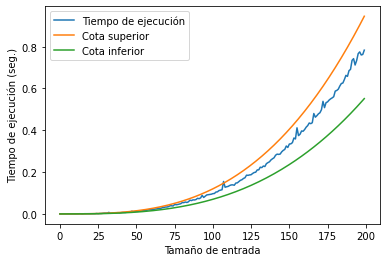

In [8]:
cubicoarriba=[0.00000012*x**3 for x in range(200)]
cubicoabajo=[0.00000007*x**3 for x in range(200)]
plt.plot(tiempos,label='Tiempo de ejecución')
plt.plot(cubicoarriba, label='Cota superior')
plt.plot(cubicoabajo, label= 'Cota inferior')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución (seg.)")

## ¿Cómo le hacemos para encontrar las constantes para la notación O grande de una forma más ordenada?

Supongamos que nos piden mostrar que $f(n)$ es $O(g(n))$. La siguiente lista de pasos resulta ser muy útil.

- Primero, simplificar tanto $f(n)$ como $g(n)$ a funciones sencillas con el mismo orden, usando las propiedades de suma y de producto. Digamos que las versiones simplificadas se llaman $f_1(x)$ y $g_1(x)$
- Si $f_1(x)$ se ve mucho más chiquito que $g_1(x)$, intentar ver que el límite $g_1(x)/f_1(x)$ se va a infinito.
- Si esto no funciona y se va a una constante, es porque son del mismo orden, y entonces hay que encontrar las constantes. Para ello, se recomienda primero fijar la $c$ de la notación O grande que quede muy holgada, y luego intentar encontrar una $n$ que funcione.

## ¿Cómo es el tiempo de un algorimo que tiene orden $n\log n$

Se puede pensar como algo que está entre tiempo lineal y tiempo cuadrático, pero muy muy cercano a tiempo lineal.

Text(0, 0.5, 'Tiempo de ejecución')

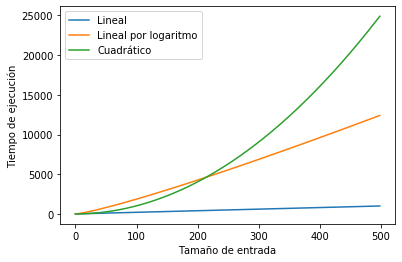

In [50]:
lineal=[2*n for n in range(1,500)]
nlogn=[4*n*np.log(n) for n in range(1,500)]
cuadratico=[0.1*n**2 for n in range(1,500)]

plt.plot(lineal,label='Lineal')
plt.plot(nlogn, label='Lineal por logaritmo')
plt.plot(cuadratico, label = "Cuadrático")

plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución")

## ¿Por qué una supercomputadora o cómputo paralelo no mejoran la complejidad asintótica?

Lo que hace el cómputo paralelo es usar más procesadores de manera simultántenea, pero de cualquier forma se tienen que hacer todas las operaciones que se necesitan para ejecutar el algoritmo. Si bien el cómputo paralelo puede distribuir mucho mejor el trabajo y en el día a día ejecutar los algoritmos más rápidos, esta mejora sólo es de una constante multiplicativa.

Por ejemplo, si tenemos que realizar $n^2$ operaciones para un algoritmo que corre en una entrada $n$ en una computadora normal, y luego mejoramos a un cluster de $100$ computadoras con $16$ veces el número de procesadores cada una, el tiempo baja únicamente a $n^2/1600$, que siguie siendo de orden cuadrático.

# Estructuras de datos

Un estructura de datos es una forma de organizar la información que tenemos de un problema utilizando los recursos de la computadora (memoria, tiempo de ejecución, etc.). Idealmente, lo que queremos es representar los aspectos de nuestro problema de la mejor manera.

Algunos ejemplos de estructuras de datos son los siguientes:
- Arreglos
- Listas (enlace sencillo, enlace doble)
- Matrices
- Hash tables (tablas hash, matriz asociativa)
- Diccionarios
- Conjuntos
- Arreglos dinámicos
- Árboles
- Listas de adyacencia de gráficas
- Listas de incidencia de gráficas

Cuando tenemos varios objetos que queremos almacenar o procesar, la elección de la estructura de datos que utilizamos es muy importante pues dependiendo de la que elijamos puede que tengamos ciertas ventajas en memoria, en ciertos tipos de algoritmos, etc.

Un ejemplo sencillo es la diferencia de arreglos vs. listas. Ambos permiten almacenar varios objetos, pero funcionan de manera diferente.

Los arreglos primero almacenan en la memoria de manera continua exactamente la cantidad de espacio necesaria para guardar los objetos que queremos. Medio informalmente, si le pedimos a una compu un arreglo con 10 elementos, entonces reserva exactamente 10 espacios en la memoria. Esto tiene la ventaja de que se puede leer de manera rápica los elementos, pero la desventaja de que es una estructura muy rígida y que requiere muchas operaciones para ser modificada (añadir elementos, quitar elementos, cambiar el tamaño del arreglo).

Las listas, por lado, para cada elemento almacenan el elemento mismo y dónde estará el siguiente. Esto tiene la flexibilidad de poder manipular la lista muy rápido y de manera sencilla, y la ventaja de aceptar una cantidad dinámica de objetos. Sin embargo, tiene la desventaja de que la lectura de elementos no es tan sencilla y que necesitamos usar más memoria: para el objeto y para la ubicación de la siguiente entrada. Así es como funcionan las listas de Python.

En Python los arreglos no están implementados de manera tan directa.

Otra forma de almacenar objetos es mediante tablas hash que de fondo aplican una función a una referencia para determinar donde almacenar la información que queremos. Tienen la ventaja de tener lectura y edición muy rápidas, pero la desventaja de almacenar más información que simplemente los objetos y perder la "noción de adyacencia" que tienen las listas y los arreglos. En Python los diccionarios funcionan más o menos como tablas hash.

Hagamos algunos experimentos. A continuación están las formas en las que se listas y diccionarios en Python.

In [51]:
# Se crea una lista
L=[2,3,8,5,-1,2,9,2,3]

# Se crea un diccionario
D={0:2,1:3,2:8,3:5,4:-1,5:2,6:9,7:2,8:3}

# Leemos en cada uno
L[3],D[3]

(5, 5)

Aquí abajo hacemos el siguiente experimiento. Tomamos $n$ números aleatorios entre $1$ y $n$, que pueden estar repetidos. Queremos preguntarnos cuántos números del $1$ al $n$ sí fueron elegidos. Para elegir los números, usamos la función `np.random.randint` de NumPy.

Para responder la pregunta lo hacemos de dos formas distintas. La primera es pasando el nparray a una lista y la segunda es pasando el nparray a un diccionario. Tomamos el tiempo para cada uno. Luego, hacemos una gráfica en donde para cada $n$ vemos cuánto se tardó usando cada estructura.

Realizaremos este experimento para varios valores de $n$, de modo que podamos ver cuánto tarda en ejecutarse.

In [2]:
# En estas listas almacenaremos cuánto se tardó para cada tamaño de entrada
times_L=[]
times_D=[]

# Hagamos todos los elementos de la lista y del diccionario iguales a 1
for size in range(1,10000,500):
    # Creamos una lista aleatoria de números
    random=np.random.randint(1,size+1,size)
    
    # Ponemos los números aleatorios que generamos en una lista y en un diccionario
    L=list(random)
    D={L[i]:i for i in range(size)}
    
    a=datetime.now()
    count=0
    for j in range(size):
        if j in L:
            count+=1
    b=datetime.now()
    times_L.append((b-a).total_seconds())

    a=datetime.now()
    count=0
    for j in range(size):
        if j in D:
            count+=1
    b=datetime.now()
    times_D.append((b-a).total_seconds())

[]

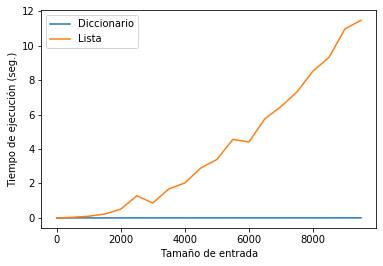

In [59]:
size=np.array(range(1,10000,500))

#Hacemos la gráfica para ver cuánto se tardó para cada tamaño de entrada
plt.plot(size,times_D,label="Diccionario")
plt.plot(size,times_L,label="Lista")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de ejecución (seg.)")
plt.legend()
plt.plot()

In [54]:
# Aquí mostramos cuánto se tardó en la entrada 
# más grande y qué tan más rápido es usar diccionarios
print(str(times_L[-1]) + " segundos usando lista")
print(str(times_D[-1]) + " segundos usando diccionario")
print(str(times_L[-1]/times_D[-1]) + " veces más rápido")

11.47391 segundos usando lista
0.004291 segundos usando diccionario
2673.9477977161505 veces más rápido


Observémos cómo en el experimento anterior la diferencia es enorme (es $6040$ veces más rápido usar diccionarios). Para los diccionarios, el tiempo de ejecución es siempre prácticamente el mismo y es despreciable. Para las listas, el tiempo de ejecución crece bastante.

# Algoritmos para ordenar

Una tarea fundamental cuando se hacen algoritmos es aprender a ordenar elementos. Esto se debe a varias razones, entre ellas:

- El ordenar elementos muchas veces es un paso previo a realizar otras operaciones.
- Los algoritmos de ordenar son tan variados, que permiten hablar de muchas ideas importantes de estructuras de datos y heurísticas de elaboración de algoritmos.

## Cosas que hay que fijar antes de ordenar

- ¿Cuál va a ser el orden que estemos usando? 
- ¿Ordenaremos de manera creciente o decreciente?
- ¿Qué recursos tenemos a nuestra disposición (tiempo/espacio)?
- ¿En nuestra aplicación es posible que haya elementos iguales? Si sí, ¿cómo queremos tratarlos?
- Otras consideraciones, como el tipo de objetos que ordenaremos, o si la la lista que ordenaremos ya está "medio ordenada".

Para responder todo esto de manera formal, lo primero que tenemos que acordar es un **orden parcial** en la familia de objetos que nos interesan. Esto lo que quiere decir es que debemos decir una operación de comparación $\leq$ que para cada par de objetos nos dice cuál de ellos es menor o igual que el otro.

En todo lo que hablaremos a continuación, pensaremos que la comparación de cualquiera dos elementos se puede hacer con un solo paso. Esto no necesariamente es cierto en algunas apliaciones, pues puede que comparar sea muy difícil, sin embargo estamos haciendo esta suposición pues de momento nos interesa ordenar pensando en que comparar parejas es sencillo.

## ¿Por qué ordenar es útil?

En muchas ocasiones, ordenar sirve como un paso previo a otros algorimos. Por ejemplo, consideremos los siguientes problemas:

- Buscar un elemento en un diccionario.
- Encontrar dentro de una colección de objetos, los dos que estén "más cercanos" con respecto al orden.
- Determinar si todo elemento aparece de manera única.
- Encontrar la frecuencia de un elemento en una lista, por ejemplo, para saber cuál elemento aparece más veces.
- Determinar el $k$-ésimo elemento más grande de una lista de elementos.

## Ordenar con una heurística básica y buenas estructuras de datos

Consideremos la siguiente heurística para ordenar una colección de elementos $L$. Tomamos el elemento mínimo, y lo ponemos como primer elemento de una lista auxiliar $M$. Lo eliminamos de $L$. Repetimos esto hasta que terminemos.

Si hacemos esta heurística en una estructura que guarda a la colección simplemente como una lista, esta heurística ordena colecciones de $n$ elementos en tiempo $O(n^2)$. 

Sin embargo, si primero pasamos los elementos de la colección a un árbol de búsqueda binaria balanceado y luego aplicamos la heurística, para crear el árbol usamos tiempo $O(n)$ y luego para encontrar el mínimo tiempo $O(\log n)$. Como se encuentra el mínimo en promedio $O(n)$ veces, todas estas operaciones toman en total tiempo $O(n)+O(n\log n) = O(n\log n)$.

## Ordenar usando un algoritmo recursivo

Otra heurística en programación consiste en dividir un problema grande en problemas pequeños. A esto se los conoce como "divide y conquista".

Una forma de aplicar esta heurística para ordenar una colección de $n$ elementos es dividirlos en dos pequeños grupos de $\approx n/2$ elementos, ordenar cada uno de estos pequeños grupos por separado, y luego decidir cómo juntar estas listas ordenadas.